In [2]:
import pandas as pd 
import gspread 
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
scope = ['https://spreadsheets.google.com/feeds']
json_path = r"C:\Users\pedro\Projetos_Python\Projetos\Portifolio\web_scraping_fut\Estatisticas_Brasileirao\gbq.json" 
credentials = ServiceAccountCredentials.from_json_keyfile_name(json_path, scope) 
gc = gspread.authorize(credentials)

spreadsheet_key = "1nVyKyf4dVwrCleXtGz3gH7b6Hvs08pLsDr_ENfwL4LM"
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("Classificação")
table_classificacao = worksheet.get_all_values()

classificacao = pd.DataFrame(table_classificacao[1:], columns = table_classificacao[0])
classificacao.head()

,rank,team,games,wins,ties,losses,goals_for,goals_against,goal_diff,points,points_avg,xg_for,xg_against,xg_diff,xg_diff_per90,last_5,attendance_per_g,top_team_scorers,top_keeper,notes
0,1,Botafogo (RJ),10,8,0,2,18,7,11,24,2.4,16.6,11.4,5.2,0.52,LWWLW,"3,951",Tiquinho Soares - 8,Lucas Perri,
1,2,Palmeiras,10,6,4,0,22,8,14,22,2.2,16.8,8,8.8,0.88,DDDWW,"7,167","Raphael Veiga, Artur - 4",Wéverton,
2,3,Flamengo,10,6,1,3,21,11,10,19,1.9,17.9,12,5.9,0.59,WWDWW,"15,998",Pedro - 4,Santos,
3,4,Atlético Mineiro,10,5,3,2,14,8,6,18,1.8,14.5,9.8,4.7,0.47,WWDWD,"17,863",Hulk - 5,Éverson,
4,5,Fluminense,10,5,2,3,16,11,5,17,1.7,13.8,16.4,-2.7,-0.27,WLLWD,"9,650","Ganso, Germán Cano... - 3",Fábio,


In [11]:
numeric_columns = classificacao.columns.drop(['team','last_5','attendance_per_g','top_team_scorers','top_keeper','notes'])

classificacao[numeric_columns] = classificacao[numeric_columns].astype(float)

classificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              20 non-null     float64
 1   team              20 non-null     object 
 2   games             20 non-null     float64
 3   wins              20 non-null     float64
 4   ties              20 non-null     float64
 5   losses            20 non-null     float64
 6   goals_for         20 non-null     float64
 7   goals_against     20 non-null     float64
 8   goal_diff         20 non-null     float64
 9   points            20 non-null     float64
 10  points_avg        20 non-null     float64
 11  xg_for            20 non-null     float64
 12  xg_against        20 non-null     float64
 13  xg_diff           20 non-null     float64
 14  xg_diff_per90     20 non-null     float64
 15  last_5            20 non-null     object 
 16  attendance_per_g  20 non-null     object 
 17 

## O que é xG?
O Valor Esperado de Gol, também conhecido como Expected Goals (xG), é uma métrica estatística utilizada no futebol para avaliar as chances de um determinado lance ou jogada resultar em gol. Ele é baseado em modelos matemáticos que levam em consideração vários fatores, como a posição do jogador, o ângulo do chute, a distância até o gol, entre outros.

O conceito de xG surge da ideia de que nem todos os chutes têm a mesma probabilidade de resultar em gol. Alguns lances são mais claros e têm maior probabilidade de serem convertidos em gols, enquanto outros são mais difíceis e têm menor probabilidade de sucesso.


## Como é calculado?
Para calcular o xG de uma jogada, os analistas de dados e estatísticos utilizam dados históricos de muitos jogos anteriores. Eles analisam uma grande quantidade de chutes similares ao lance em questão e verificam quantos desses chutes resultaram em gol. Com base nesses dados, é possível estimar a probabilidade de um chute específico resultar em gol.

O xG é expresso como um valor entre 0 e 1, onde 0 significa que a probabilidade de marcar gol é muito baixa, e 1 significa que há uma alta probabilidade de marcar. Por exemplo, se um jogador tem um xG de 0,3 em um determinado lance, isso significa que, em média, a cada 10 vezes que ele tentar essa jogada, espera-se que ele marque cerca de 3 gols.

## Como utilizá-lo na análise?
O Valor Esperado de Gol é útil tanto para avaliar o desempenho de jogadores e equipes quanto para auxiliar treinadores e técnicos nas tomadas de decisões táticas. Por exemplo, se uma equipe tem um alto xG em um determinado jogo, mas não conseguiu marcar, isso pode indicar que tiveram má sorte ou que o goleiro adversário fez defesas excepcionais. Por outro lado, se uma equipe tem um baixo xG em um jogo, pode ser um indicativo de que sua eficiência ofensiva está abaixo do esperado.

É importante ressaltar que o xG não é uma medida absoluta de qualidade, mas sim uma estimativa com base em estatísticas. Jogadores e equipes podem superar ou ficar aquém de suas expectativas de xG em determinados momentos, devido a vários fatores, como habilidade, precisão do chute, pressão defensiva, entre outros.

## TLDR
Em resumo, o Valor Esperado de Gol (xG) é uma métrica estatística que estima a probabilidade de um chute ou jogada resultar em gol, com base em dados históricos. É uma ferramenta valiosa para avaliar o desempenho de jogadores e equipes, além de auxiliar na análise tática do jogo.

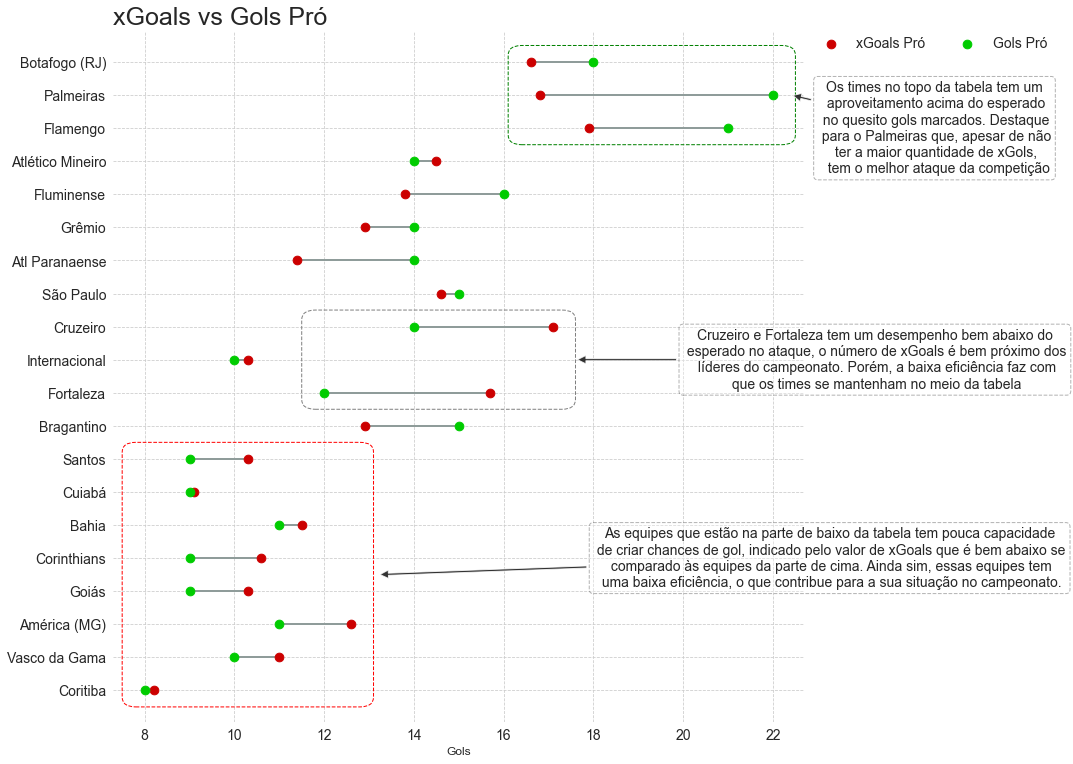

In [14]:
import matplotlib.patches as patches

fig = plt.figure(figsize = (12, 12))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
my_range=range(len(classificacao.index)+1,1,-1)

ax = plt.axes(frameon=False)
plt.hlines(y=my_range, xmin=classificacao['xg_for'], xmax=classificacao['goals_for'], color='#8f9c9a', lw =2)
plt.scatter(classificacao['xg_for'], my_range, color='#cc0000', s=75, label='xGoals Pró', zorder=3)
plt.scatter(classificacao['goals_for'], my_range, color='#00cc00', s=75, label='Gols Pró', zorder=3)


plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="best", frameon=False,fontsize=14)
plt.yticks(my_range, classificacao['team'],fontsize=14)
plt.xticks(fontsize=14)
plt.title("xGoals vs Gols Pró", loc='left', fontsize=25)
plt.xlabel('Gols', fontsize=12)

x_min = classificacao[classificacao['rank'] == 1]['xg_for'][0] - 0.2
x_max = classificacao[classificacao['rank'] == 2]['goals_for'][1] + 0.2
y_min = 18.8
y_max = 21.2
width = x_max - x_min
height = y_max - y_min
rect = patches.FancyBboxPatch((x_min, y_min), width, height, linewidth=1, ls='--', edgecolor='g', facecolor='none')
plt.gca().add_patch(rect)

an1 = ax.annotate('''Os times no topo da tabela tem um\n aproveitamento acima do esperado\n no quesito gols marcados. Destaque\n para o Palmeiras que, apesar de não\n ter a maior quantidade de xGols,\n  tem o melhor ataque da competição''',
                  xy=(22.4, 20),
                  xytext=(23, 19),
                  fontsize=14,
                  va='center',
                  ma='center',
                  arrowprops=dict(fc='black',alpha=0.8,arrowstyle=patches.ArrowStyle("simple", head_length=.6, head_width=.6,tail_width=0.15)),
                  bbox=dict(boxstyle='round', fc='white',ec='black',ls='--', alpha=0.3))

x_min = classificacao[classificacao['rank'] == 11]['goals_for'][10] - 0.2
x_max = classificacao[classificacao['rank'] == 9]['xg_for'][8] + 0.2
y_min = 10.8
y_max = 13.2
width = x_max - x_min
height = y_max - y_min
rect = patches.FancyBboxPatch((x_min, y_min), width, height, linewidth=1, ls='--', edgecolor='grey', facecolor='none')
plt.gca().add_patch(rect)

an2 = ax.annotate('''Cruzeiro e Fortaleza tem um desempenho bem abaixo do\n esperado no ataque, o número de xGoals é bem próximo dos\n líderes do campeonato. Porém, a baixa eficiência faz com\n que os times se mantenham no meio da tabela''',
                  xy=(17.6, 12),
                  xytext=(20, 12),
                  fontsize=14,
                  va='center',
                  ma='center',
                  arrowprops=dict(fc='black',alpha=0.8,arrowstyle=patches.ArrowStyle("simple", head_length=.6, head_width=.6,tail_width=0.15)),
                  bbox=dict(boxstyle='round', fc='white',ec='black',ls='--', alpha=0.3))

x_min = classificacao[classificacao['rank'] == 20]['goals_for'][19] - 0.2
x_max = classificacao[classificacao['rank'] == 18]['xg_for'][17] + 0.2
y_min = 1.8
y_max = 9.2
width = x_max - x_min
height = y_max - y_min
rect = patches.FancyBboxPatch((x_min, y_min), width, height, linewidth=1, ls='--', edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

an2 = ax.annotate('''As equipes que estão na parte de baixo da tabela tem pouca capacidade\n de criar chances de gol, indicado pelo valor de xGoals que é bem abaixo se\n comparado às equipes da parte de cima. Ainda sim, essas equipes tem\n uma baixa eficiência, o que contribue para a sua situação no campeonato.''',
                  xy=(13.2,5.5),
                  xytext=(18, 6),
                  fontsize=14,
                  va='center',
                  ma='center',
                  arrowprops=dict(fc='black',alpha=0.8,arrowstyle=patches.ArrowStyle("simple", head_length=.6, head_width=.6,tail_width=0.15)),
                  bbox=dict(boxstyle='round', fc='white',ec='black',ls='--', alpha=0.3))


plt.show()

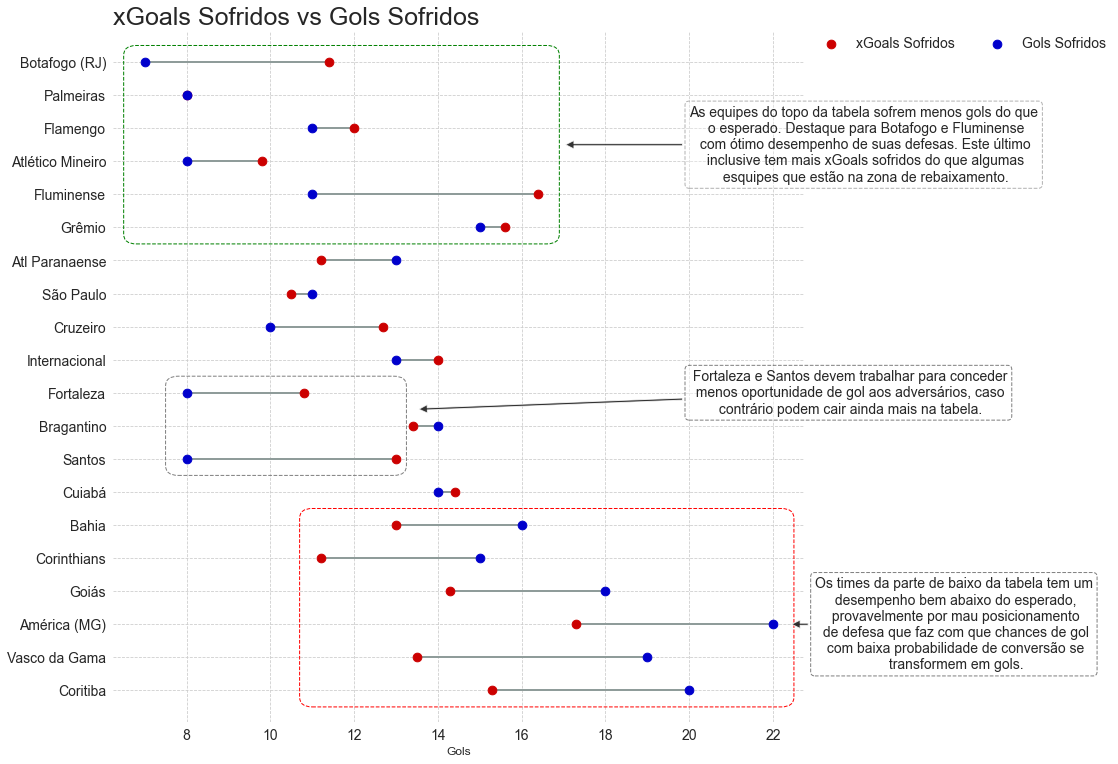

In [20]:
fig = plt.figure(figsize = (12, 12) )
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
my_range=range(len(classificacao.index)+1,1,-1)

ax = plt.axes(frameon=False)
plt.hlines(y=my_range, xmin=classificacao['xg_against'], xmax=classificacao['goals_against'], color='#8f9c9a', lw =2)
plt.scatter(classificacao['xg_against'], my_range, color='#cc0000', s=75, label='xGoals Sofridos', zorder=3)
plt.scatter(classificacao['goals_against'], my_range, color='#0000cc', s=75, label='Gols Sofridos', zorder=3)


plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="best", frameon=False,fontsize=14)
plt.yticks(my_range, classificacao['team'],fontsize=14)
plt.xticks(fontsize=14)
plt.title("xGoals Sofridos vs Gols Sofridos", loc='left', fontsize=25)
plt.xlabel('Gols',fontsize=12)

x_min = classificacao[classificacao['rank'] == 1]['goals_against'][0] - 0.2
x_max = classificacao[classificacao['rank'] == 5]['xg_against'][4] + 0.2
y_min = 15.8
y_max = 21.2
width = x_max - x_min
height = y_max - y_min
rect = patches.FancyBboxPatch((x_min, y_min), width, height, linewidth=1, ls='--', edgecolor='g', facecolor='none')
plt.gca().add_patch(rect)

an1 = ax.annotate('''As equipes do topo da tabela sofrem menos gols do que\n o esperado. Destaque para Botafogo e Fluminense\n com ótimo desempenho de suas defesas. Este último\n inclusive tem mais xGoals sofridos do que algumas\n esquipes que estão na zona de rebaixamento.''',
                  xy=(17, 18.5),
                  xytext=(20, 18.5),
                  fontsize=14,
                  va='center',
                  ma='center',
                  arrowprops=dict(fc='black',alpha=0.8,arrowstyle=patches.ArrowStyle("simple", head_length=.6, head_width=.6,tail_width=0.15)),
                  bbox=dict(boxstyle='round', fc='white',ec='black',ls='--', alpha=0.3))

x_min = classificacao[classificacao['rank'] == 11]['goals_against'][10] - 0.2
x_max = classificacao[classificacao['rank'] == 13]['xg_against'][12] - 0.05
y_min = 8.8
y_max = 11.2
width = x_max - x_min
height = y_max - y_min
rect = patches.FancyBboxPatch((x_min, y_min), width, height, linewidth=1, ls='--', edgecolor='grey', facecolor='none')
plt.gca().add_patch(rect)

an3 = ax.annotate(''' Fortaleza e Santos devem trabalhar para conceder\n menos oportunidade de gol aos adversários, caso\n contrário podem cair ainda mais na tabela.''',
                  xy=(13.5, 10.5),
                  xytext=(20,11),
                  annotation_clip=False,
                  fontsize=14,
                  va='center',
                  ma='center',
                  arrowprops=dict(fc='black',alpha=0.8,arrowstyle=patches.ArrowStyle("simple", head_length=.6, head_width=.6,tail_width=0.15)),
                  bbox=dict(boxstyle='round', fc='white',ec='black',ls='--',alpha=0.5,capstyle='butt'))

x_min = classificacao[classificacao['rank'] == 16]['xg_against'][15] - 0.2
x_max = classificacao[classificacao['rank'] == 18]['goals_against'][17] + 0.2
y_min = 1.8
y_max = 7.2
width = x_max - x_min 
height = y_max - y_min
rect = patches.FancyBboxPatch((x_min, y_min), width, height, linewidth=1, ls='--', edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)

an3 = ax.annotate('''Os times da parte de baixo da tabela tem um\n desempenho bem abaixo do esperado,\n provavelmente por mau posicionamento\n de defesa que faz com que chances de gol\n com baixa probabilidade de conversão se\n transformem em gols.''',
                  xy=(22.4, 4),
                  xytext=(23, 4),
                  annotation_clip=False,
                  fontsize=14,
                  va='center',
                  ma='center',
                  arrowprops=dict(fc='black',alpha=0.8,arrowstyle=patches.ArrowStyle("simple", head_length=.6, head_width=.6,tail_width=0.15)),
                  bbox=dict(boxstyle='round', fc='white',ec='black',ls='--',alpha=0.5,capstyle='butt'))

plt.show()